<a href="https://colab.research.google.com/github/ProsperChuks/Amazon-Deforestation-from-Space/blob/main/forecasts/population_estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dependecies

In [1]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 14.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

### Loading Dumped files

In [7]:
world_pop = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/pickled files/wrld.pkl', 'rb'))
world_growth = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/pickled files/wgrt.pkl', 'rb'))
cbr = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/pickled files/cbr.pkl', 'rb'))
cdr = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/pickled files/cdr.pkl', 'rb'))

### Preprocessing

In [9]:
world_pop.index = pd.to_datetime(world_pop.index)
cdr.CDR = pd.to_numeric(cdr.CDR)
cdr.index = pd.to_datetime(cdr.index, format='%Y')
world_pop
cdr = cdr.resample('M').interpolate()
# cdr.fillna(value=cdr.CDR.interpolate(), inplace=True)
cdr

,CDR
MidPeriod,
1958-01-31,17.364085
1958-02-28,17.344565
1958-03-31,17.322953
1958-04-30,17.302039
1958-05-31,17.280427
...,...
2019-09-30,7.593121
2019-10-31,7.595414
2019-11-30,7.597633


#### checking for trend and seasonality

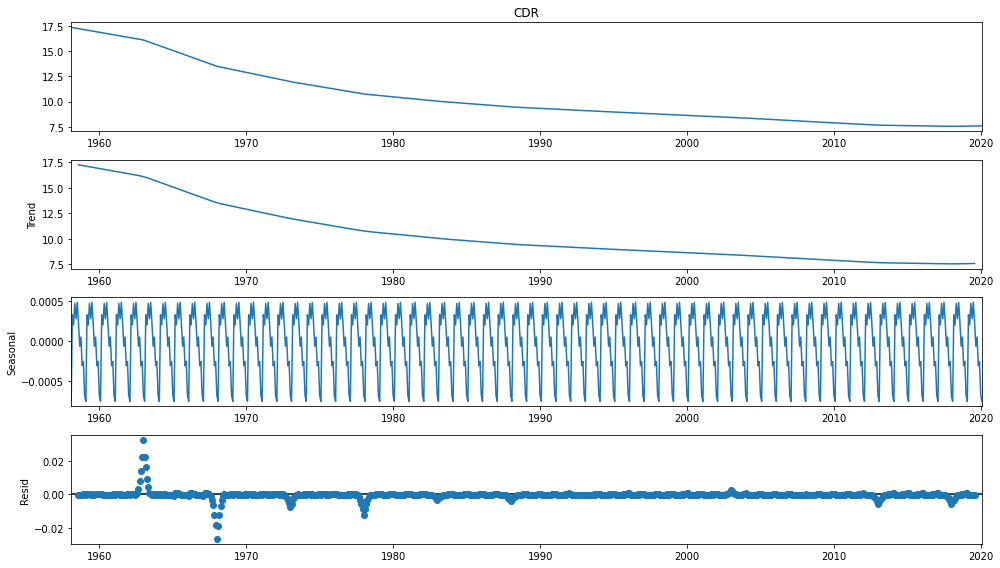

In [11]:
rcParams['figure.figsize'] = 14, 8
cdr.sort_index(inplace=True)
decomp_series = sm.tsa.seasonal_decompose(cdr.CDR, model='addictive')
decomp_series.plot()
plt.show()

### Forecasting the Crude Death Rate

In [12]:
train_df = cdr.iloc[:500]
test_df = cdr.iloc[500:]
test_df

,CDR
MidPeriod,
1999-09-30,8.663670
1999-10-31,8.658204
1999-11-30,8.652913
1999-12-31,8.647447
2000-01-31,8.641980
...,...
2019-09-30,7.593121
2019-10-31,7.595414
2019-11-30,7.597633


#### HoltWinters Exponential Forecast

In [16]:
model = ExponentialSmoothing(train_df['CDR'],
                             trend='add').fit()

predict = model.forecast(300)

In [17]:
fig = px.line(train_df, train_df.index, 'CDR')
fig.add_scatter(x=test_df.index, y=test_df.CDR, name='Actual')
fig.add_scatter(x=predict.index, y=predict, name='Predicted')
fig.show()

#### Auto Regressive Forecast

In [20]:
ar_model = AutoReg(train_df['CDR'], 150, trend='n').fit(cov_type='HC0')
start = len(train_df)
stop = len(train_df) + len(test_df) -1

predict = ar_model.predict(start=start, end=stop, dynamic=True)
fig = px.line(train_df, train_df.index, 'CDR', labels={'x':'Date'})
fig.add_scatter(x=test_df.index, y=test_df.CDR, name='Actual')
fig.add_scatter(x=predict.index, y=predict, name='Predicted')
fig.show()